In [3]:
import scanpy as sc
import sys
import seaborn as sns
from matplotlib import pylab as plt
import os
import matplotlib.backends.backend_pdf as mpdf


sys.path.append("/oak/stanford/groups/smontgom/amarder/t21_download/Functions/")
direc="/oak/stanford/groups/smontgom/amarder/data/t21/ScanpyObjects"
headdir="/oak/stanford/groups/smontgom/amarder/t21-proj"
# Get the global settings
#from global_settings import global_settings
#global_settings()

# Get the bespoke analysis functions
from scRNA_functions import scRNA_functions
fc = scRNA_functions()

disease_status="Healthy"
sampletype="Liver"

print("OK.")



 * Initialising ...


OK.


In [4]:
#######

fout="10X_" + disease_status + "_" + sampletype + ".umap.h5ad"
foutpath=headdir + "/out/data/" + fout
print("\n * Reading in data..." + foutpath)
adata=sc.read_h5ad(foutpath)

myColors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
            '#307D7E', '#000000', '#DDEFFF', '#000035', '#7B4F4B', '#A1C299', '#300018', '#C2FF99', '#0AA6D8', '#013349',
            '#00846F', '#8CD0FF', '#3B9700', '#04F757', '#C8A1A1', '#1E6E00', '#DFFB71', '#868E7E', '#513A01', '#CCAA35',
            '#800080', '#DAA520', '#1E90FF', '#3CB371', '#9370DB', '#8FBC8F', '#00FF7F', '#0000CD', '#556B2F', '#FF00FF',
            '#CD853F', '#6B8E23', '#008000', '#6495ED', '#00FF00', '#DC143C', '#FFFF00', '#00FFFF', '#FF4500', '#4169E1',
            '#48D1CC', '#191970', '#9ACD32', '#FFA500', '#00FA9A', '#2E8B57', '#40E0D0', '#D2691E', '#66CDAA', '#FFEFD5',
            '#20B2AA', '#FF0000', '#EEE8AA', '#BDB76B', '#E9967A', '#AFEEEE', '#000080', '#FF8C00', '#B22222', '#5F9EA0',
            '#ADFF2F', '#FFE4B5', '#7B68EE', '#7FFFD4', '#0000FF', '#BA55D3', '#90EE90', '#FFDAB9', '#6A5ACD', '#8B0000',
            '#8A2BE2', '#CD5C5C', '#F08080', '#228B22', '#FFD700', '#006400', '#98FB98', '#00CED1', '#00008B', '#9400D3',
            '#9932CC', '#4B0082', '#F0E68C', '#483D8B', '#008B8B', '#8B008B', '#4682B4']

# f, axs = plt.subplots(1,1,figsize=(20,16))
# sns.set(font_scale=1.5)
# sns.set_style("white")

os.chdir(headdir + "/out/figures")
fplotout="10X_"+disease_status+"_"+sampletype+".umap.pdf"
pdf = mpdf.PdfPages(fplotout)
print("\n * Plotting UMAP..." + headdir + "/out/figures"+ fplotout)




 * Reading in data.../oak/stanford/groups/smontgom/amarder/t21-proj/out/data/10X_Healthy_Liver.umap.h5ad

 * Plotting UMAP.../oak/stanford/groups/smontgom/amarder/t21-proj/out/figures10X_Healthy_Liver.umap.pdf


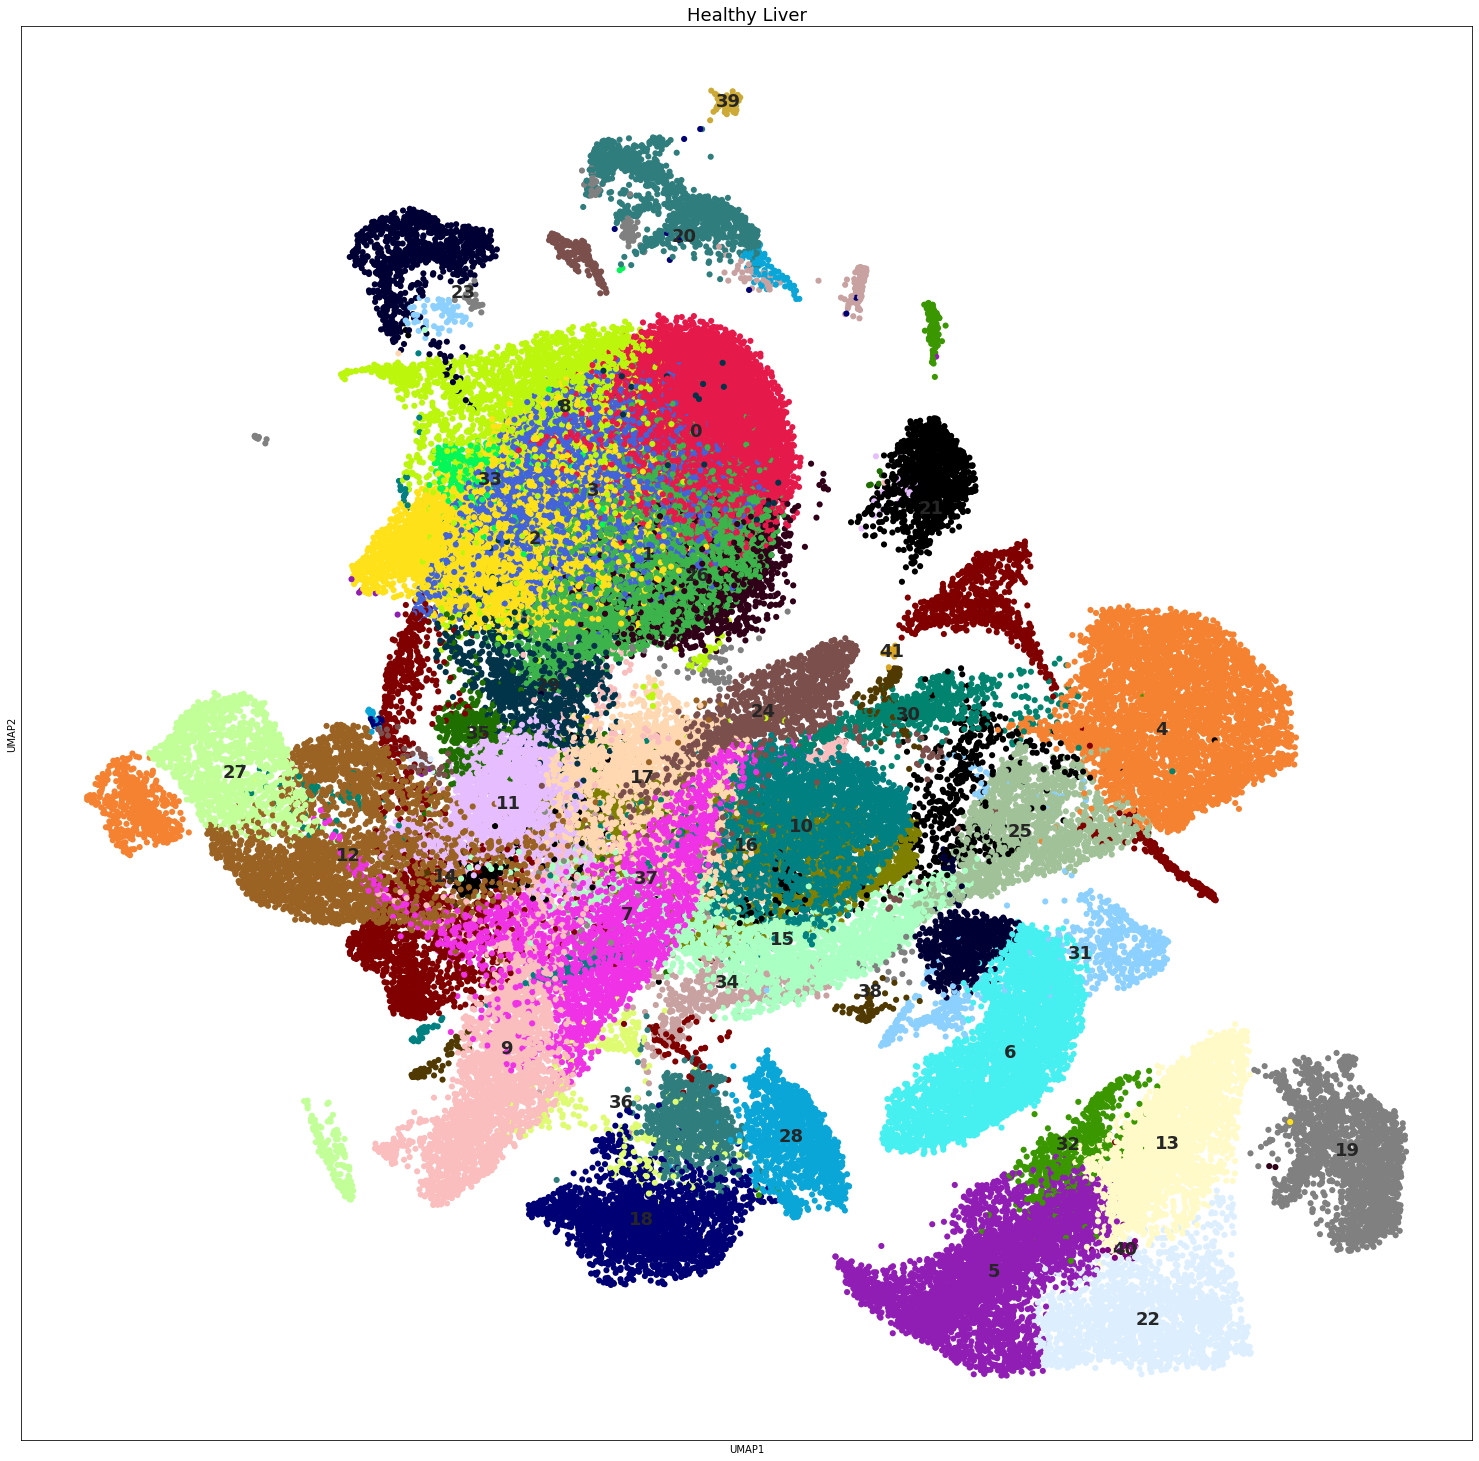

<Figure size 432x288 with 0 Axes>

In [5]:
f, axs = plt.subplots(1,1,figsize=(26,26))
sns.set(font_scale=1.5)
sns.set_style("white")
sc.pl.umap(adata, color="leiden", size=150, palette=myColors, components='1,2', ax=axs, show=True, use_raw=False, title=disease_status + ' ' + sampletype,legend_loc="on data")
plt.tight_layout()
plt.show(block=False)
# pdf.savefig()
# plt.close()


In [6]:
markerDict= {'HSC/Progenitors' : ['CD34', 'SPINK2'],
    'Erythroid' : ['GATA1', 'KLF1'],
    'Mast cells' : ['HDC', 'CPA3'],
    'Megakaryocytes' : ['ITGA2B', 'GP9'],
    'Myeloid' :[ 'LYZ', 'SPI1'],
    'NK cells' : ['NKG7', 'GZMA'],
    'B cells' : ['CD79A', 'IGHM'],
    'Stroma' : ['ALB', 'AFP']}


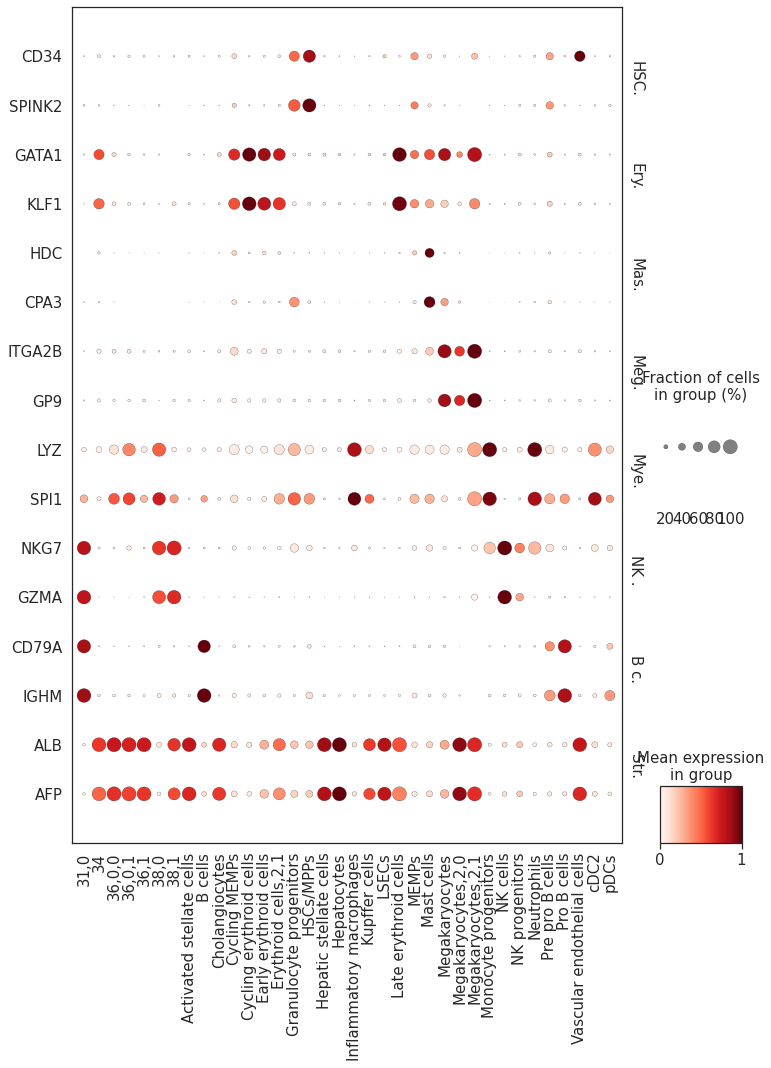

In [15]:
ax = sc.pl.dotplot(adata,
                   markerDict,
                   groupby="leiden_v7",
                   standard_scale='var',
                   smallest_dot=0.0,
                   dot_min=None,
                   dot_max=None,
                   color_map='Reds',
                   dendrogram=False,
                   figsize=(12,15),
                   show=True,
                   #save="{0}_Leiden_v1.png".format(name),
                   linewidths=2,swap_axes=True)


In [13]:
adata.obs

,n_genes,patient,sample,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_rb,pct_counts_rb,organ,...,leiden_v2,leiden_v3,leiden_v4,leiden_v5,leiden_v5_split,leiden_v6,leiden_v7_split,leiden_v7,annotations_atac,annotations_atac_v2
AAACCCAAGGAACGCT-1-0,4870,15633,L15633A,4870,26948.0,615.0,2.282173,9433.0,35.004452,Liver,...,MEMPs,MEMPs,MEMPs,Mast cells,Mast cells,Mast cells,"Mast cells,1",Early erythroid cells,Early erythroid cells,Early erythroid cells
AAACCCAAGTAAACAC-1-0,1167,15633,L15633A,1167,2420.0,66.0,2.727273,443.0,18.305784,Liver,...,B cells,B cells,B cells,B cells,B cells,B cells,B cells,B cells,B cells,B cells
AAACCCAAGTTACTCG-1-0,1047,15633,L15633A,1047,2154.0,87.0,4.038997,490.0,22.748375,Liver,...,NK cells,NK cells,NK cells,NK cells,NK cells,NK cells,NK cells,NK cells,NK cells,NK cells
AAACCCACAAGTTTGC-1-0,3707,15633,L15633A,3707,18166.0,627.0,3.451503,5833.0,32.109436,Liver,...,cDC2,cDC2,cDC2,cDC2,"cDC2,4",cDC2,cDC2,cDC2,cDC2,cDC2
AAACCCACACAGAGCA-1-0,2024,15633,L15633A,2024,5762.0,256.0,4.442902,1617.0,28.063171,Liver,...,Monocyte precursors,Monocyte precursors,Monocyte precursors,Monocyte progenitors,"Monocyte progenitors,0",Monocyte progenitors,"Monocyte progenitors,4",Monocyte progenitors,Monocyte progenitors,Monocyte progenitors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGTAATCA-1-10,2415,15781,L15781D,2415,4788.0,170.0,3.550543,281.0,5.868839,Liver,...,Tolerogenic macrophages,Tolerogenic macrophages,Kupffer cells,Kupffer cells,Kupffer cells,Kupffer cells,Kupffer cells,Kupffer cells,Kupffer cells,Kupffer cells
TTTGTTGCAAATCGTC-1-10,2096,15781,L15781D,2096,5379.0,504.0,9.369771,765.0,14.221973,Liver,...,Tolerogenic macrophages,Tolerogenic macrophages,Kupffer cells,Kupffer cells,Kupffer cells,Kupffer cells,Kupffer cells,Kupffer cells,Kupffer cells,Kupffer cells
TTTGTTGCAATTCTCT-1-10,4481,15781,L15781D,4481,21050.0,629.0,2.988123,5558.0,26.403799,Liver,...,"38,0","38,0","38,0","38,0","38,0","38,0","38,0","38,0","38,0","38,0"
TTTGTTGTCATTATCC-1-10,4075,15781,L15781D,4075,19841.0,460.0,2.318432,6316.0,31.833073,Liver,...,cDC2,cDC2,cDC2,cDC2,"cDC2,0",cDC2,cDC2,cDC2,cDC2,cDC2


In [14]:
adata.obs[["leiden"]]

,leiden
AAACCCAAGGAACGCT-1-0,11
AAACCCAAGTAAACAC-1-0,4
AAACCCAAGTTACTCG-1-0,6
AAACCCACAAGTTTGC-1-0,7
AAACCCACACAGAGCA-1-0,12
...,...
TTTGTTGAGGTAATCA-1-10,9
TTTGTTGCAAATCGTC-1-10,9
TTTGTTGCAATTCTCT-1-10,38
TTTGTTGTCATTATCC-1-10,7
